## Overview Analysis


Summary Statistics:
--------------------------------------------------
Total number of companies analyzed: 870
Total keywords matched: 30,993,459

Top 5 companies by total matches:
     Symbol  total_matches
672     PTT       175531.0
48    TISCO       143521.0
437    TRUE       137106.0
30   GUNKUL       135407.0
110    LHFG       127799.0

Average matches per category:
Innovation: 4,191.0
Integrity: 22,087.1
Quality: 4,860.8
Respect: 4,008.0
Teamwork: 518.8

Percentage distribution of keywords:
Innovation: 11.8%
Integrity: 61.9%
Quality: 13.6%
Respect: 11.2%
Teamwork: 1.5%

Correlation Analysis:

Strong correlations found:
innovation - integrity: 0.88
innovation - quality: 0.95
innovation - respect: 0.92
innovation - teamwork: 0.91
integrity - quality: 0.87
integrity - respect: 0.91
integrity - teamwork: 0.85
quality - respect: 0.94
quality - teamwork: 0.90
respect - teamwork: 0.92

Score Analysis:

Average scores by category:
avg_score_on_keyword_integrity     12.477434
avg_score_o

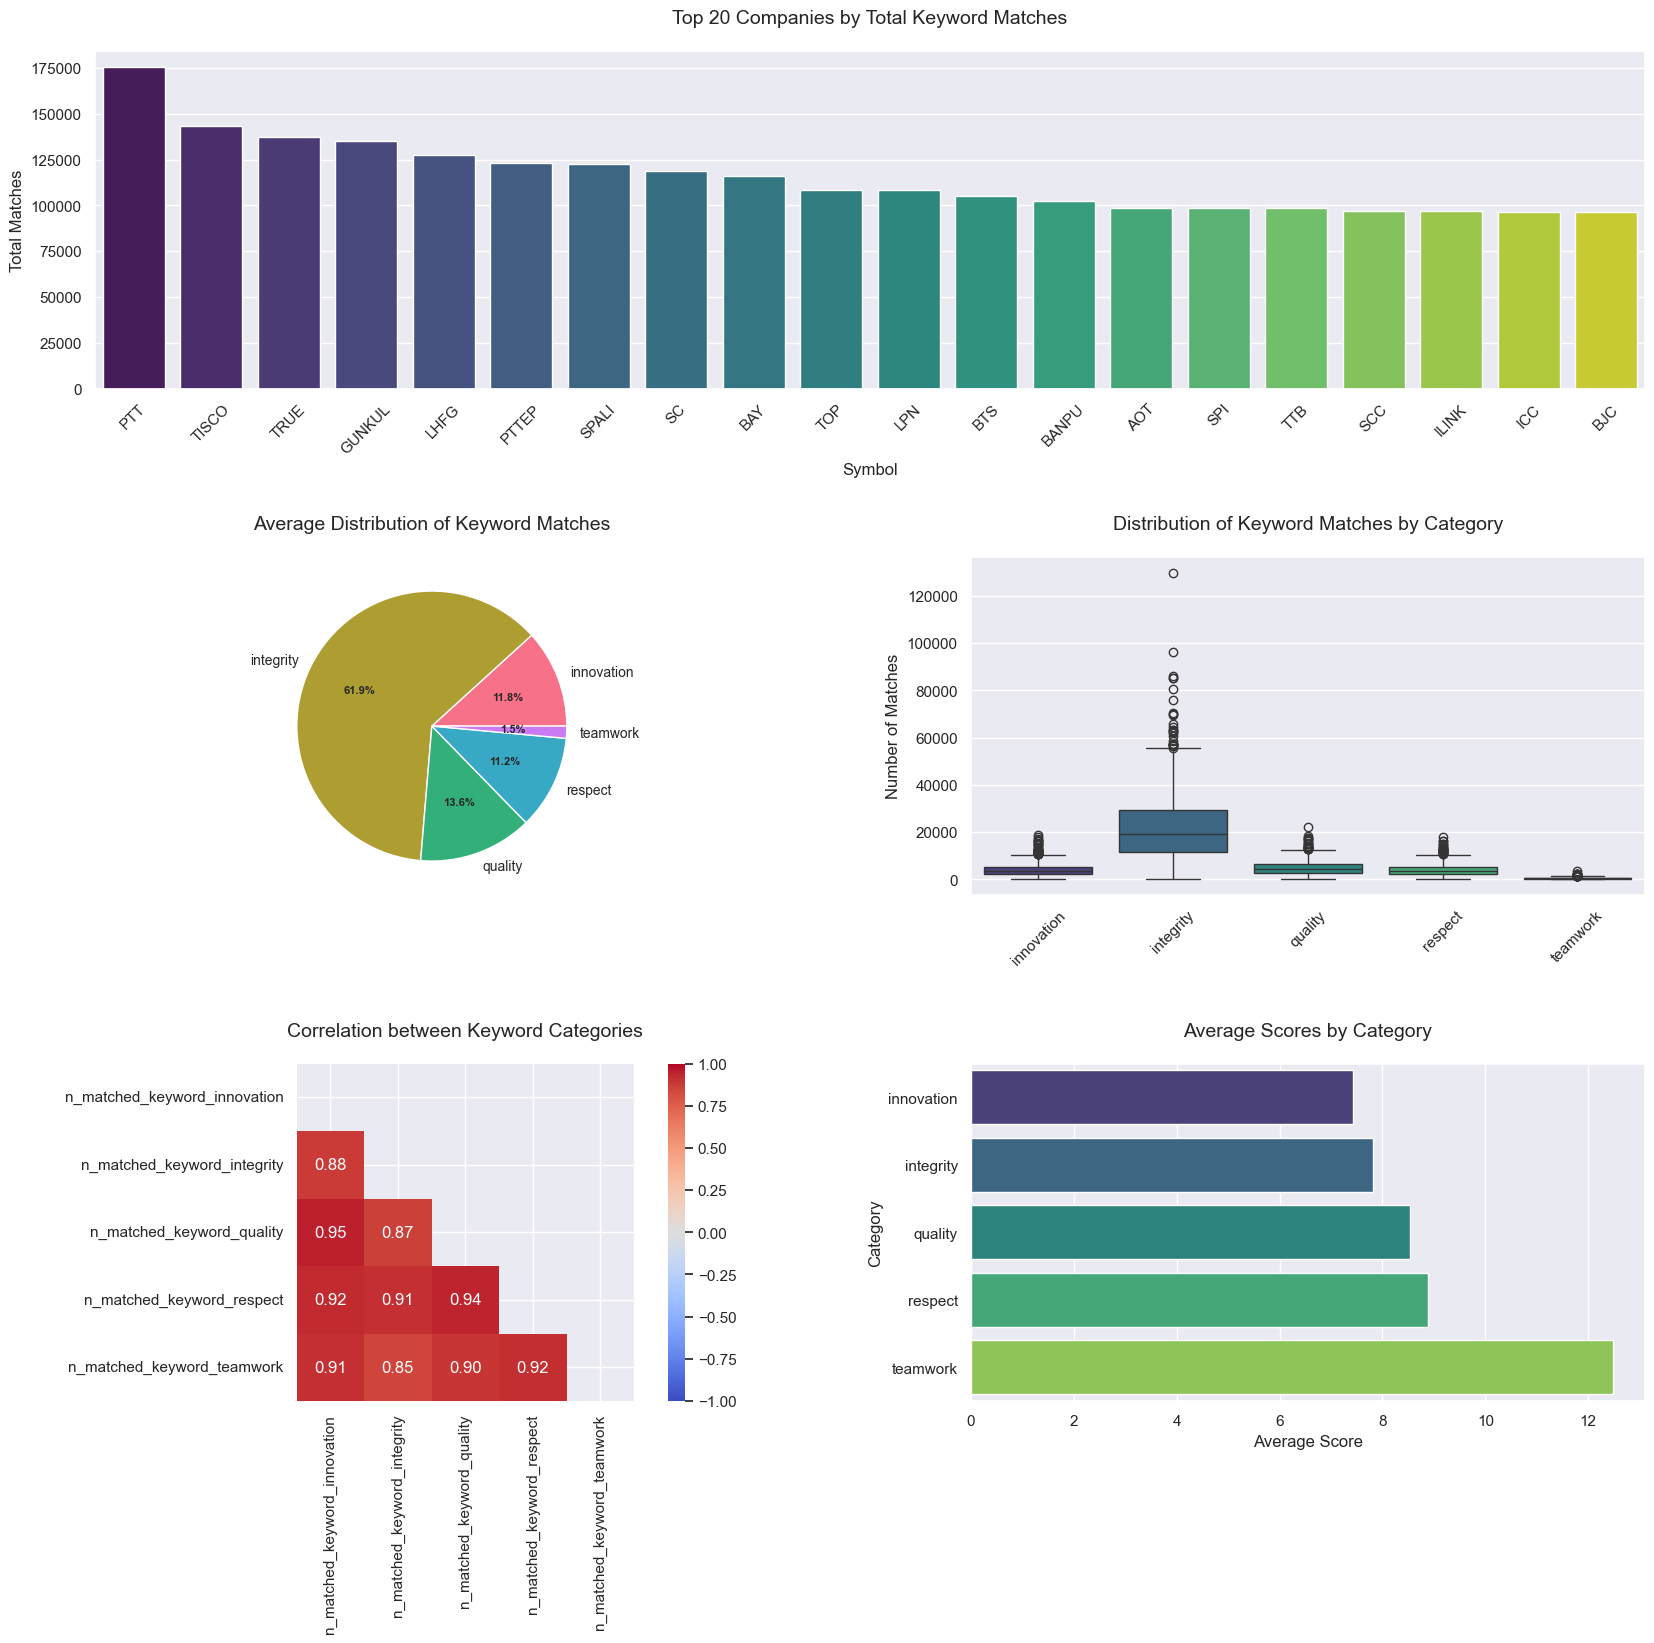

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style before creating any plots
plt.style.use('default')  
sns.set_theme()  

# Read and process the data
def clean_numeric_column(value):
    if isinstance(value, str):
        return float(value.replace(',', '').replace('%', ''))
    return value

# Create DataFrame from the data
df = pd.read_csv(r'.\summary_result_with_industry.csv')

# Clean up numeric columns
numeric_columns = [col for col in df.columns if 'matched' in col or 'score' in col or 'pct' in col]
for col in numeric_columns:
    df[col] = df[col].apply(clean_numeric_column)

# Calculate total matches for each company
keyword_cols = ['n_matched_keyword_innovation', 'n_matched_keyword_integrity', 
                'n_matched_keyword_quality', 'n_matched_keyword_respect', 
                'n_matched_keyword_teamwork']
df['total_matches'] = df[keyword_cols].sum(axis=1)

# Create the correlation matrix before plotting
correlation = df[keyword_cols].corr()

# Create the melted dataframe for boxplot
df_melt = df[keyword_cols].melt()
df_melt['variable'] = df_melt['variable'].str.replace('n_matched_keyword_', '')

# Create figure with adjusted spacing
fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(3, 2, hspace=0.5, wspace=0.3)

# 1. Top 20 Companies by Total Matches
ax1 = fig.add_subplot(gs[0, :])
top_20 = df.nlargest(20, 'total_matches')
sns.barplot(data=top_20, x='Symbol', y='total_matches', hue='Symbol', 
            ax=ax1, legend=False, palette='viridis')
ax1.set_title('Top 20 Companies by Total Keyword Matches', pad=20, fontsize=14)
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel('Total Matches')

# 2. Average Distribution Pie Chart
ax2 = fig.add_subplot(gs[1, 0])
averages = df[keyword_cols].mean()
colors = sns.color_palette('husl', n_colors=5)
wedges, texts, autotexts = ax2.pie(averages, 
                                  labels=[col.replace('n_matched_keyword_', '') for col in keyword_cols],
                                  autopct='%1.1f%%',
                                  colors=colors)
ax2.set_title('Average Distribution of Keyword Matches', pad=20, fontsize=14)
plt.setp(autotexts, size=8, weight="bold")
plt.setp(texts, size=10)

# 3. Box Plot of Keyword Categories
ax3 = fig.add_subplot(gs[1, 1])
sns.boxplot(data=df_melt, x='variable', y='value', hue='variable',
            ax=ax3, legend=False, palette='viridis')
ax3.set_title('Distribution of Keyword Matches by Category', pad=20, fontsize=14)
ax3.tick_params(axis='x', rotation=45)
ax3.set_xlabel('')
ax3.set_ylabel('Number of Matches')

# 4. Correlation Heatmap
ax4 = fig.add_subplot(gs[2, 0])
mask = np.triu(np.ones_like(correlation))
sns.heatmap(correlation, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            ax=ax4, 
            fmt='.2f',
            square=True,
            vmin=-1, 
            vmax=1,
            center=0)
ax4.set_title('Correlation between Keyword Categories', pad=20, fontsize=14)

# 5. Average Scores Comparison
ax5 = fig.add_subplot(gs[2, 1])
score_cols = [col for col in df.columns if 'avg_score' in col]
avg_scores = df[score_cols].mean().sort_values(ascending=True)
score_labels = [col.replace('avg_score_on_keyword_', '') for col in score_cols]

# Create a DataFrame for the scores plot
scores_df = pd.DataFrame({
    'Category': score_labels,
    'Score': avg_scores.values
})

sns.barplot(data=scores_df, x='Score', y='Category', hue='Category',
            ax=ax5, legend=False, palette='viridis')
ax5.set_title('Average Scores by Category', pad=20, fontsize=14)
ax5.set_xlabel('Average Score')

# Adjust layout
plt.subplots_adjust(top=0.95, bottom=0.05, hspace=0.5, wspace=0.3)

# Print summary statistics
print("\nSummary Statistics:")
print("-" * 50)
print(f"Total number of companies analyzed: {len(df)}")
print(f"Total keywords matched: {df['total_matches'].sum():,.0f}")

print("\nTop 5 companies by total matches:")
print(df.nlargest(5, 'total_matches')[['Symbol', 'total_matches']].to_string())

print("\nAverage matches per category:")
for col, avg in zip(['Innovation', 'Integrity', 'Quality', 'Respect', 'Teamwork'], 
                    df[keyword_cols].mean()):
    print(f"{col}: {avg:,.1f}")

print("\nPercentage distribution of keywords:")
percentages = df[keyword_cols].sum() / df[keyword_cols].sum().sum() * 100
for category, percentage in zip(['Innovation', 'Integrity', 'Quality', 'Respect', 'Teamwork'], 
                              percentages):
    print(f"{category}: {percentage:.1f}%")

# Calculate and print correlations
print("\nCorrelation Analysis:")
high_correlations = []
for i in range(len(keyword_cols)):
    for j in range(i+1, len(keyword_cols)):
        corr = df[keyword_cols[i]].corr(df[keyword_cols[j]])
        if abs(corr) > 0.7:  # Strong correlation threshold
            high_correlations.append((
                keyword_cols[i].replace('n_matched_keyword_', ''),
                keyword_cols[j].replace('n_matched_keyword_', ''),
                corr
            ))

print("\nStrong correlations found:")
for pair in high_correlations:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.2f}")

# Calculate and print score statistics
print("\nScore Analysis:")
print("\nAverage scores by category:")
score_means = df[score_cols].mean().sort_values(ascending=False)
print(score_means.to_string())

print("\nCompanies with highest overall average scores:")
df['overall_avg_score'] = df[score_cols].mean(axis=1)
print(df.nlargest(5, 'overall_avg_score')[['Symbol', 'overall_avg_score']].to_string())

# Save the plot with better resolution
plt.savefig('keyword_analysis.png', dpi=300, bbox_inches='tight', pad_inches=0.5)
plt.show()



## Industry Analysis


Industry Overview:
------------------------------
Total Industries: 37
Most Represented: Property Development

Top 3 Industries by Average Matches:
------------------------------
Resources: 83,970 matches
Industry: 68,038 matches
Banking: 67,967 matches

Top 3 Industries by Average Score:
------------------------------
Education: 10.52 score
Financial Services: 10.19 score
Paper & Printing Materials: 10.11 score

C:\Users\tungc\AppData\Local\Temp\ipykernel_15536\1438635437.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(data=df, x='Industry', y='overall_avg_score', palette=industry_colors, ax=ax4)
C:\Users\tungc\AppData\Local\Temp\ipykernel_15536\1438635437.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=3.0)


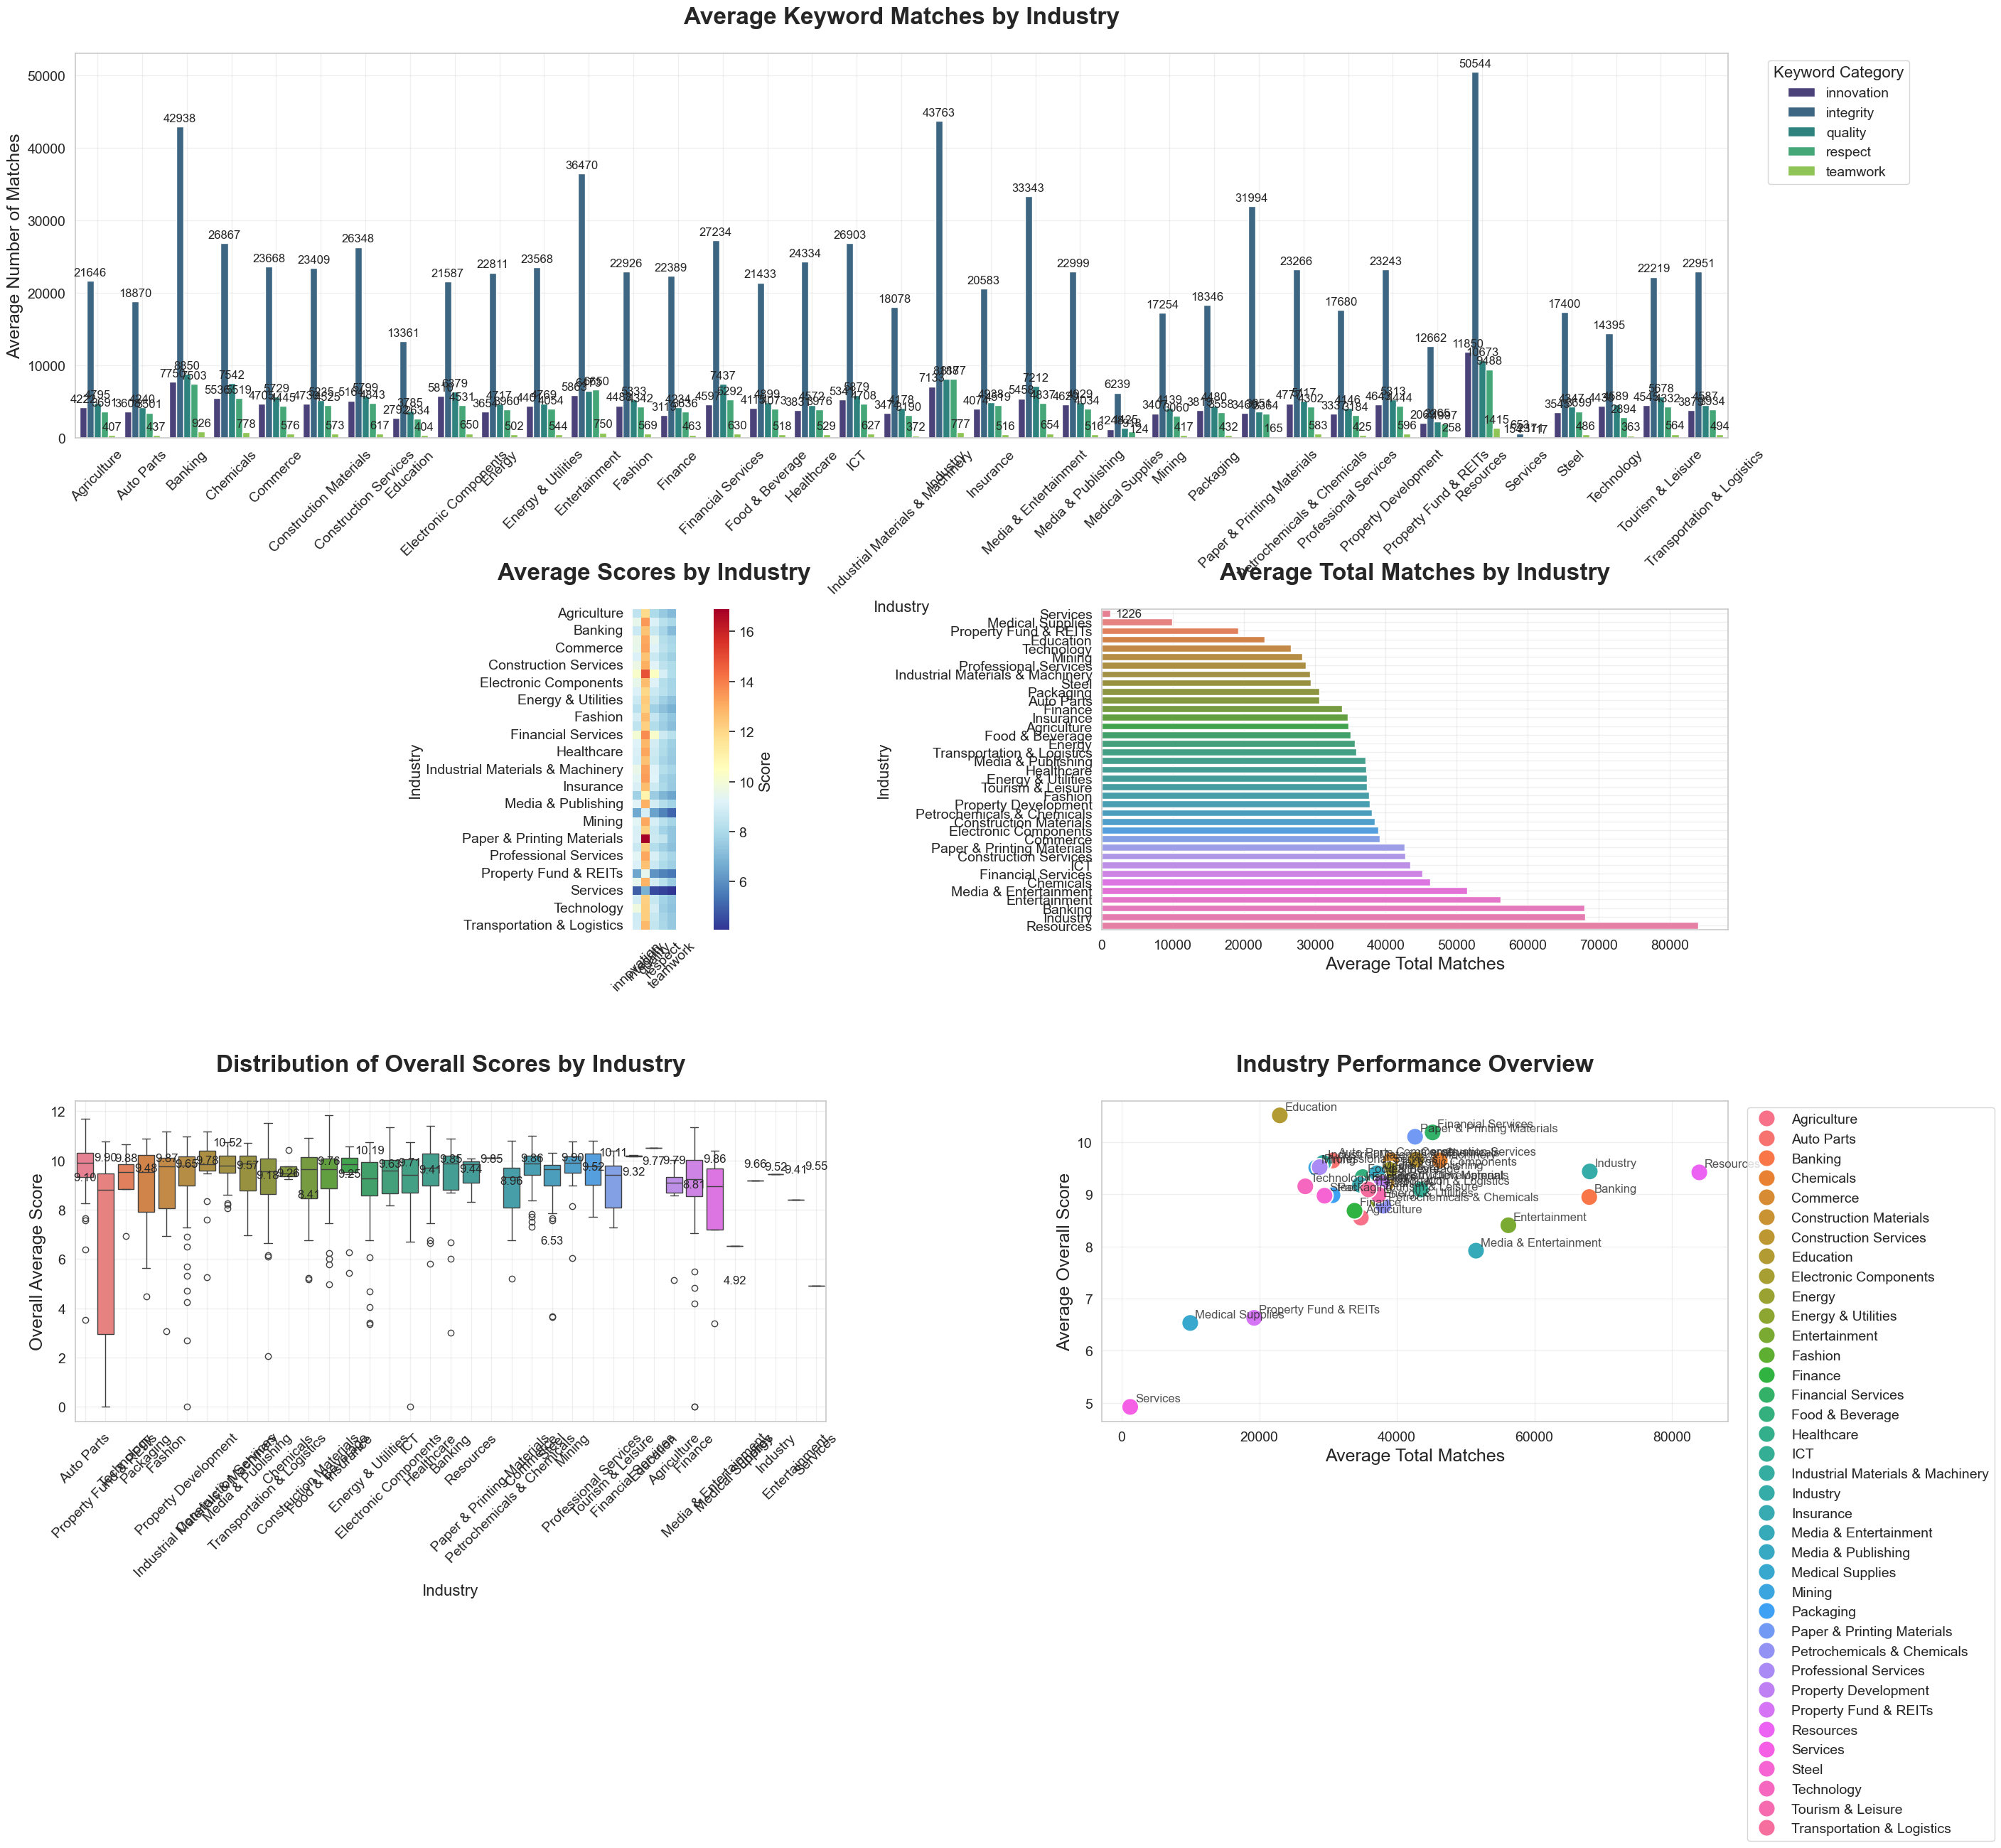


KEY INDUSTRY INSIGHTS

Industry Overview:
------------------------------
Total Industries: 37
Most Represented: Property Development

Top 3 Industries by Average Matches:
------------------------------
Resources: 83,970 matches
Industry: 68,038 matches
Banking: 67,967 matches

Top 3 Industries by Average Score:
------------------------------
Education: 10.52 score
Financial Services: 10.19 score
Paper & Printing Materials: 10.11 score


In [45]:
# Set the style and color palette with enhanced settings
plt.style.use('default')
sns.set_theme(style="whitegrid")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['font.size'] = 14  # Increased base font size
plt.rcParams['axes.labelsize'] = 16  # Increased label size
plt.rcParams['axes.titlesize'] = 20  # Increased title size
plt.rcParams['xtick.labelsize'] = 14  # Increased tick label size
plt.rcParams['ytick.labelsize'] = 14

# Read and process the data
def clean_numeric_column(value):
    if isinstance(value, str):
        return float(value.replace(',', '').replace('%', ''))
    return value

# Create DataFrame from the data
df = pd.read_csv(r'.\summary_result_with_industry.csv')

# Clean up numeric columns
numeric_columns = [col for col in df.columns if 'matched' in col or 'score' in col or 'pct' in col]
for col in numeric_columns:
    df[col] = df[col].apply(clean_numeric_column)

# Calculate total matches and overall scores
keyword_cols = ['n_matched_keyword_innovation', 'n_matched_keyword_integrity', 
                'n_matched_keyword_quality', 'n_matched_keyword_respect', 
                'n_matched_keyword_teamwork']
score_cols = [col for col in df.columns if 'avg_score' in col]
df['total_matches'] = df[keyword_cols].sum(axis=1)
df['overall_avg_score'] = df[score_cols].mean(axis=1)

# Create larger figure with better spacing
fig = plt.figure(figsize=(30, 25))  # Increased figure size
gs = fig.add_gridspec(3, 2, height_ratios=[1.2, 1, 1], width_ratios=[1.2, 1], 
                      hspace=0.5, wspace=0.4)  # Increased spacing

# Custom color palette with more vibrant colors
colors = sns.color_palette('viridis', n_colors=5)
industry_colors = sns.color_palette('husl', n_colors=len(df['Industry'].unique()))

# 1. Average Keyword Distribution by Industry with enhanced design
ax1 = fig.add_subplot(gs[0, :])
industry_averages = df.groupby('Industry')[keyword_cols].mean()
industry_averages_melted = industry_averages.reset_index().melt(id_vars=['Industry'])
industry_averages_melted['Keyword'] = industry_averages_melted['variable'].str.replace('n_matched_keyword_', '')

bars = sns.barplot(data=industry_averages_melted, x='Industry', y='value', hue='Keyword',
                  ax=ax1, palette='viridis')
ax1.set_title('Average Keyword Matches by Industry', pad=30, fontsize=24, fontweight='bold')
ax1.tick_params(axis='x', rotation=45, labelsize=14)
ax1.set_ylabel('Average Number of Matches', fontsize=18)
ax1.legend(title='Keyword Category', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=14, title_fontsize=16)
ax1.grid(True, alpha=0.3)

# Add value labels on the bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.0f', padding=3, fontsize=12)

# 2. Industry Score Heatmap with improved readability
ax2 = fig.add_subplot(gs[1, 0])
industry_scores = df.groupby('Industry')[score_cols].mean()
score_labels = [col.replace('avg_score_on_keyword_', '') for col in score_cols]
industry_scores.columns = score_labels

sns.heatmap(industry_scores, annot=False, fmt='.2f', cmap='RdYlBu_r', ax=ax2,
            cbar_kws={'label': 'Score'}, square=True, annot_kws={'size': 12})
ax2.set_title('Average Scores by Industry', pad=30, fontsize=24, fontweight='bold')
ax2.tick_params(axis='x', rotation=45, labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

# 3. Top Industries by Total Matches with enhanced design
ax3 = fig.add_subplot(gs[1, 1])
industry_totals = df.groupby('Industry')['total_matches'].mean().sort_values(ascending=True)
industry_df = pd.DataFrame({'Industry': industry_totals.index, 'Total': industry_totals.values})

bars = sns.barplot(data=industry_df, x='Total', y='Industry', hue='Industry',
                  palette=industry_colors, legend=False, ax=ax3)
ax3.set_title('Average Total Matches by Industry', pad=30, fontsize=24, fontweight='bold')
ax3.set_xlabel('Average Total Matches', fontsize=18)

# Add value labels
ax3.bar_label(bars.containers[0], fmt='%.0f', padding=5, fontsize=12)
ax3.grid(True, alpha=0.3)

# 4. Overall Score Distribution by Industry
ax4 = fig.add_subplot(gs[2, 0])
box_plot = sns.boxplot(data=df, x='Industry', y='overall_avg_score', palette=industry_colors, ax=ax4)
ax4.set_title('Distribution of Overall Scores by Industry', pad=30, fontsize=24, fontweight='bold')
ax4.tick_params(axis='x', rotation=45, labelsize=14)
ax4.set_ylabel('Overall Average Score', fontsize=18)
ax4.grid(True, alpha=0.3)

# Add median values on top of boxes
medians = df.groupby('Industry')['overall_avg_score'].median()
for i, median in enumerate(medians):
    ax4.text(i, median, f'{median:.2f}', horizontalalignment='center', verticalalignment='bottom', fontsize=12)

# 5. Industry Performance Scatter Plot
ax5 = fig.add_subplot(gs[2, 1])
industry_performance = df.groupby('Industry').agg({
    'total_matches': 'mean',
    'overall_avg_score': 'mean'
}).reset_index()

scatter = sns.scatterplot(data=industry_performance, x='total_matches', y='overall_avg_score', 
                         hue='Industry', s=300, palette=industry_colors, ax=ax5)
ax5.set_title('Industry Performance Overview', pad=30, fontsize=24, fontweight='bold')
ax5.set_xlabel('Average Total Matches', fontsize=18)
ax5.set_ylabel('Average Overall Score', fontsize=18)
ax5.grid(True, alpha=0.3)
ax5.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=14)

# Add labels for each point
for idx, row in industry_performance.iterrows():
    ax5.annotate(row['Industry'], 
                (row['total_matches'], row['overall_avg_score']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=12, alpha=0.8)

# Adjust layout with more padding
plt.tight_layout(pad=3.0)

# Save the enhanced plot with high resolution
plt.savefig('industry_analysis_enhanced_large.png', dpi=300, bbox_inches='tight', pad_inches=1.0,
            facecolor='white', edgecolor='none')
plt.show()

# Print key insights with enhanced formatting
print("\n" + "="*50)
print("KEY INDUSTRY INSIGHTS")
print("="*50)

print("\nIndustry Overview:")
print("-"*30)
print(f"Total Industries: {len(df['Industry'].unique())}")
print(f"Most Represented: {df['Industry'].mode()[0]}")

print("\nTop 3 Industries by Average Matches:")
print("-"*30)
top_matches = df.groupby('Industry')['total_matches'].mean().sort_values(ascending=False).head(3)
for ind, val in top_matches.items():
    print(f"{ind}: {val:,.0f} matches")

print("\nTop 3 Industries by Average Score:")
print("-"*30)
top_scores = df.groupby('Industry')['overall_avg_score'].mean().sort_values(ascending=False).head(3)
for ind, val in top_scores.items():
    print(f"{ind}: {val:.2f} score")


In [44]:
def create_industry_plots(df):
    """Create and save industry analysis visualizations."""
    # Prepare data
    keyword_cols = ['n_matched_keyword_innovation', 'n_matched_keyword_integrity', 
                    'n_matched_keyword_quality', 'n_matched_keyword_respect', 
                    'n_matched_keyword_teamwork']
    score_cols = [col for col in df.columns if 'avg_score' in col]
    df['total_matches'] = df[keyword_cols].sum(axis=1)
    df['overall_avg_score'] = df[score_cols].mean(axis=1)
    
    # Set the style
    plt.style.use('default')
    sns.set_theme(style="white")
    plt.rcParams.update({
        'figure.facecolor': 'white',
        'axes.facecolor': 'white',
        'font.size': 10,
        'axes.labelsize': 11,
        'axes.titlesize': 12,
        'xtick.labelsize': 9,
        'ytick.labelsize': 9
    })
    
    # 1. Keyword Distribution
    plt.figure(figsize=(10, 6))
    industry_averages = df.groupby('Industry')[keyword_cols].mean()
    industry_averages_melted = industry_averages.reset_index().melt(id_vars=['Industry'])
    industry_averages_melted['Keyword'] = industry_averages_melted['variable'].str.replace('n_matched_keyword_', '')
    
    sns.barplot(data=industry_averages_melted, x='Industry', y='value', hue='Keyword',
                palette='viridis')
    plt.title('Keyword Distribution by Industry')
    plt.xticks(rotation=45, ha='right')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Keywords')
    plt.tight_layout()
    plt.savefig('keyword_distribution.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # 2. Industry Score Heatmap
    plt.figure(figsize=(8, 6))
    industry_scores = df.groupby('Industry')[score_cols].mean()
    score_labels = [col.replace('avg_score_on_keyword_', '') for col in score_cols]
    industry_scores.columns = score_labels
    
    # Create heatmap with custom settings
    g = sns.heatmap(industry_scores, annot=True, fmt='.2f', cmap='RdYlBu_r',
                    cbar_kws={'label': 'Score'}, square=True)
    plt.title('Industry Scores Heatmap')
    plt.xticks(rotation=45, ha='right')
    g.set_yticklabels(g.get_yticklabels(), rotation=0)
    plt.tight_layout()
    plt.savefig('industry_scores_heatmap.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # 3. Total Matches by Industry
    plt.figure(figsize=(8, 6))
    industry_totals = df.groupby('Industry')['total_matches'].mean().sort_values()
    
    # Create bar plot with explicit hue
    industry_df = pd.DataFrame({'Industry': industry_totals.index, 'Total': industry_totals.values})
    sns.barplot(data=industry_df, x='Total', y='Industry', hue='Industry',
                palette='viridis', legend=False)
    plt.title('Total Matches by Industry')
    plt.xlabel('Average Total Matches')
    plt.tight_layout()
    plt.savefig('total_matches.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # 4. Score Distribution
    plt.figure(figsize=(8, 6))
    # Create box plot with explicit hue
    sns.boxplot(data=df, x='Industry', y='overall_avg_score', hue='Industry',
                palette='viridis', legend=False)
    plt.title('Score Distribution by Industry')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Overall Score')
    plt.tight_layout()
    plt.savefig('score_distribution.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # 5. Performance Overview
    plt.figure(figsize=(8, 6))
    industry_performance = df.groupby('Industry').agg({
        'total_matches': 'mean',
        'overall_avg_score': 'mean'
    }).reset_index()
    
    # Create scatter plot with explicit hue
    sns.scatterplot(data=industry_performance, x='total_matches', y='overall_avg_score',
                    hue='Industry', s=100, palette='viridis')
    plt.title('Industry Performance Overview')
    plt.xlabel('Average Total Matches')
    plt.ylabel('Average Overall Score')
    
    # Add minimal labels with better positioning
    for idx, row in industry_performance.iterrows():
        plt.annotate(row['Industry'][:3] + '.',  # Abbreviated labels
                    (row['total_matches'], row['overall_avg_score']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8)
    
    # Adjust legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    plt.tight_layout()
    plt.savefig('performance_overview.png', dpi=300, bbox_inches='tight')
    plt.close()

    return True  # Indicate successful completion


def generate_excel_report(df, filename='industry_analysis_detailed.xlsx'):
    """Generate a formatted Excel report with industry analysis."""
    keyword_cols = ['n_matched_keyword_innovation', 'n_matched_keyword_integrity', 
                    'n_matched_keyword_quality', 'n_matched_keyword_respect', 
                    'n_matched_keyword_teamwork']
    score_cols = [col for col in df.columns if 'avg_score' in col]
    
    with pd.ExcelWriter(filename, engine='xlsxwriter') as writer:
        workbook = writer.book
        
        # Create format for headers
        header_format = workbook.add_format({
            'bold': True,
            'font_size': 11,
            'bg_color': '#E0E0E0'
        })
        
        # 1. Industry Overview
        industry_summary = pd.DataFrame({
            'Number_of_Companies': df.groupby('Industry').size(),
            'Average_Total_Matches': df.groupby('Industry')['total_matches'].mean().round(2),
            'Average_Overall_Score': df.groupby('Industry')['overall_avg_score'].mean().round(2),
            'Min_Overall_Score': df.groupby('Industry')['overall_avg_score'].min().round(2),
            'Max_Overall_Score': df.groupby('Industry')['overall_avg_score'].max().round(2)
        }).round(2)
        
        industry_summary.to_excel(writer, sheet_name='Industry Overview')
        worksheet = writer.sheets['Industry Overview']
        
        # Format headers
        for col_num, value in enumerate(industry_summary.columns.values):
            worksheet.write(0, col_num + 1, str(value), header_format)
        worksheet.set_column('A:F', 20)
        
        # 2. Keyword Analysis
        # Process keyword analysis data
        keyword_means = df.groupby('Industry')[keyword_cols].mean().round(2)
        keyword_mins = df.groupby('Industry')[keyword_cols].min().round(2)
        keyword_maxs = df.groupby('Industry')[keyword_cols].max().round(2)
        
        # Rename columns for clarity
        keyword_means.columns = [f"{col.replace('n_matched_keyword_', '')}_mean" for col in keyword_means.columns]
        keyword_mins.columns = [f"{col.replace('n_matched_keyword_', '')}_min" for col in keyword_mins.columns]
        keyword_maxs.columns = [f"{col.replace('n_matched_keyword_', '')}_max" for col in keyword_maxs.columns]
        
        # Combine all keyword metrics
        keyword_analysis = pd.concat([keyword_means, keyword_mins, keyword_maxs], axis=1)
        
        keyword_analysis.to_excel(writer, sheet_name='Keyword Analysis')
        worksheet = writer.sheets['Keyword Analysis']
        
        # Format headers
        for col_num, value in enumerate(keyword_analysis.columns.values):
            worksheet.write(0, col_num + 1, str(value), header_format)
        worksheet.set_column('A:Z', 15)
        
        # 3. Score Analysis
        # Process score analysis data
        score_means = df.groupby('Industry')[score_cols].mean().round(2)
        score_mins = df.groupby('Industry')[score_cols].min().round(2)
        score_maxs = df.groupby('Industry')[score_cols].max().round(2)
        
        # Rename columns for clarity
        score_means.columns = [f"{col.replace('avg_score_on_keyword_', '')}_mean" for col in score_means.columns]
        score_mins.columns = [f"{col.replace('avg_score_on_keyword_', '')}_min" for col in score_mins.columns]
        score_maxs.columns = [f"{col.replace('avg_score_on_keyword_', '')}_max" for col in score_maxs.columns]
        
        # Combine all score metrics
        score_analysis = pd.concat([score_means, score_mins, score_maxs], axis=1)
        
        score_analysis.to_excel(writer, sheet_name='Score Analysis')
        worksheet = writer.sheets['Score Analysis']
        
        # Format headers
        for col_num, value in enumerate(score_analysis.columns.values):
            worksheet.write(0, col_num + 1, str(value), header_format)
        worksheet.set_column('A:Z', 15)

def main(data_path):
    """Main function to run the analysis."""
    # Read and process the data
    df = pd.read_csv(data_path)
    
    # Clean numeric columns
    numeric_columns = [col for col in df.columns if 'matched' in col or 'score' in col or 'pct' in col]
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '').str.replace('%', ''), 
                               errors='coerce')
    
    # Calculate total matches and overall scores
    keyword_cols = ['n_matched_keyword_innovation', 'n_matched_keyword_integrity', 
                    'n_matched_keyword_quality', 'n_matched_keyword_respect', 
                    'n_matched_keyword_teamwork']
    score_cols = [col for col in df.columns if 'avg_score' in col]
    df['total_matches'] = df[keyword_cols].sum(axis=1)
    df['overall_avg_score'] = df[score_cols].mean(axis=1)
    
    # Create visualizations
    create_industry_plots(df)
    
    # Generate Excel report
    generate_excel_report(df)
    
    # Print summary statistics
    print("\n" + "="*50)
    print("KEY INDUSTRY INSIGHTS")
    print("="*50)
    
    print("\nIndustry Overview:")
    print("-"*30)
    print(f"Total Industries: {len(df['Industry'].unique())}")
    print(f"Most Represented: {df['Industry'].mode()[0]}")
    
    print("\nTop 3 Industries by Average Matches:")
    print("-"*30)
    top_matches = df.groupby('Industry')['total_matches'].mean().sort_values(ascending=False).head(3)
    for ind, val in top_matches.items():
        print(f"{ind}: {val:,.0f} matches")
    
    print("\nTop 3 Industries by Average Score:")
    print("-"*30)
    top_scores = df.groupby('Industry')['overall_avg_score'].mean().sort_values(ascending=False).head(3)
    for ind, val in top_scores.items():
        print(f"{ind}: {val:.2f} score")

if __name__ == "__main__":
    data_path = r'.\summary_result_with_industry.csv'
    main(data_path)


KEY INDUSTRY INSIGHTS

Industry Overview:
------------------------------
Total Industries: 37
Most Represented: Property Development

Top 3 Industries by Average Matches:
------------------------------
Resources: 83,970 matches
Industry: 68,038 matches
Banking: 67,967 matches

Top 3 Industries by Average Score:
------------------------------
Education: 10.52 score
Financial Services: 10.19 score
Paper & Printing Materials: 10.11 score
